# Clustering

## KMeans

#### Kmeans Theory

Kmeans is 

- iterative
- top-down (divisive)

In broad strokes: 
- the number of clusters is given beforehand
- initial centers of clusters are found
- for each point:
  - distances to each cluster center are found
  - points are assigned the cluster to whos center they're closest
- new centers of clusters are calculated
- the two processes above are repeated until a set threshold is met (# of epochs, a minimal number of pts are not switched clusters, etc.)

![top](img/from-top.gif)

- we repeat this process for another cluster number
- we determine the best number of clusters by:
  - find the kink in the elbow ('scree') plot of the SSE distance of each obs. to its cluster center (kind of like KNN)
  - silhouette scores
      - (the distance of each point to its cluster center / avg distance of pts in that cluster to the center) is graphed and organized by cluster, which makes "knife" shapes
      - use these as criteria when comparing cluster number graphs: 
          - knives all the same "thickness"
          - avg silhouette score for each knife is high 

#### Kmeans Code

In [26]:
# Required packages
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import my own code for the demo clusters
from demo_images import *

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

In [5]:
dummy_dat = pd.read_csv("xclara.txt",header=0,index_col=0)

dummy_dat.head()

,V1,V2
1,2.072345,-3.241693
2,17.936710,15.784810
3,1.083576,7.319176
4,11.120670,14.406780
5,23.711550,2.557729


In [6]:
dummy_dat.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [7]:
model = KMeans(n_clusters=4).fit(dummy_dat)

In [8]:
model.cluster_centers_

array([[ 47.72334096,  59.0133431 ],
       [ 69.92418447, -10.11964119],
       [  9.45577774,  10.66209744],
       [ 31.37882712,  60.5867573 ]])

Do you have different cluster_centers?
*Good!*

We saw in the demo that the algorithm is sensitive to starting points.

We can use the additional argument `random_state` to set the seed and have a repeatable results

In [10]:
model_setseed = KMeans(n_clusters=4, random_state=10).fit(dummy_dat)
model_setseed.cluster_centers_

array([[ 48.09974943,  59.34612869],
       [ 69.92418447, -10.11964119],
       [  9.45577774,  10.66209744],
       [ 31.77135822,  60.10656849]])

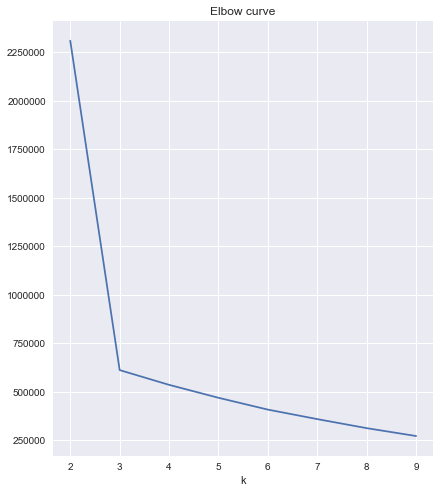

In [11]:
# Specifying the dataset and initializing variables
X = dummy_dat
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

In [12]:
def silhouette_plot(n_clusters, cluster_labels, X):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_object)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_object)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

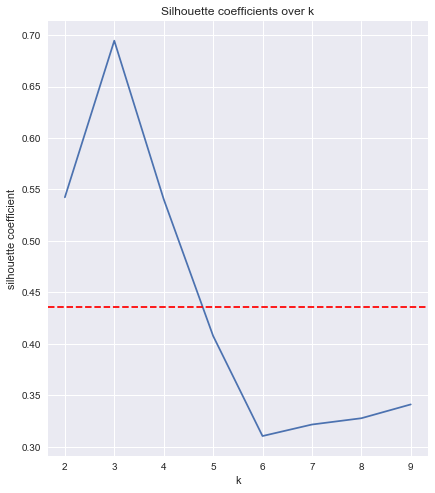

In [13]:
# Generate silhouette coefficient for each k
X = dummy_dat
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

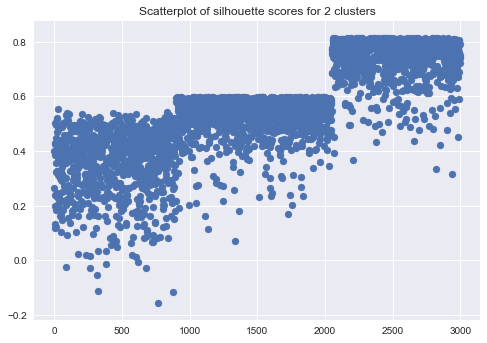

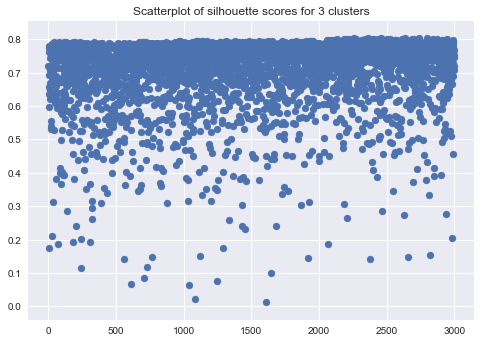

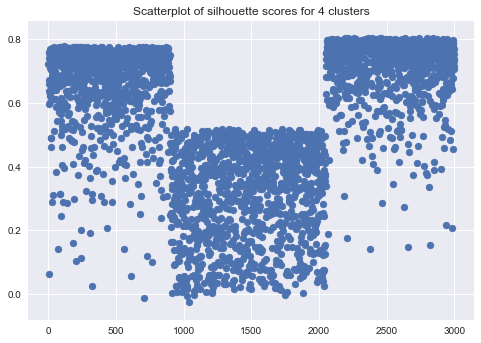

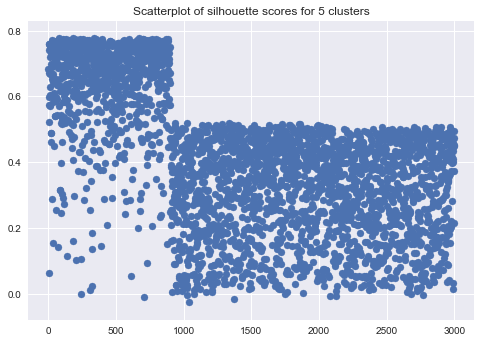

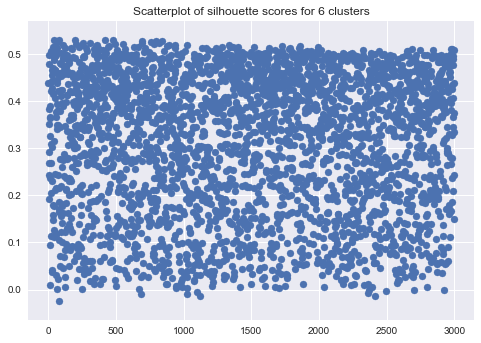

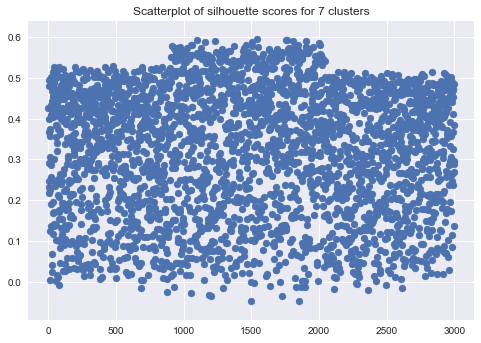

In [14]:
#scatterplot of silhouette scores
X = dummy_dat

for k in range(2,8):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    samples = silhouette_samples(X, cluster_labels)
    plt.scatter(range(0,len(samples)), samples)
    plt.title('Scatterplot of silhouette scores for {} clusters'
              .format(k)
             )
    plt.show()

## Hierarchical clustering

> Set of points before any clustering
![](img/pre_cluster_points.png)

### Visualizations

Can allow us to see the clusters within clusters 

![](img/clustergram.png)

### Dendrogram

- Useful in visualizing HIGH dimensional separation
- Can choose just "n" clusters
    + cut the link of the highest tree for two clusters
    + clusters are more alike

![](img/dendrogram.png)

## Types

### Single link

(Not in scikit-learn)

- links at the distance between (closest points) in each cluster
- tends to create elongated clusters (reachs out to the other points)
- tends to eat-up a lot of the points for a cluster

### Complete link

- Same as single link, however uses the farthest point
- Tends to create more compact clusters
- However, will tend to "ignore" other points that are *similar* to the actual cluster

### Average link

- Same as complete but will use the measurement average for each point-to-point distance in each cluster

### Ward

- Minimizes variance during cluster merge
    + Center between cluster calculated
    + Sum Sq-Distance from pts in clusters to center
    + Subtract pt distance from cluster centers
 
 
$$Dist(A, B) = \sum_{x_a \in A} \sum_{x_b \in B} \left [ (c_0-x_a)^2 + (c_0-x_b)^2  - (c_a-x_a)^2 - (c_b-x_b)^2  \right] $$

### Hierarchical code

In [22]:
from sklearn import datasets, cluster
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, ward, single

In [23]:
X = datasets.load_iris().data[:70]

c = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = c.fit_predict(X)

model = cluster.AgglomerativeClustering(n_clusters=3)
model = model.fit(X)

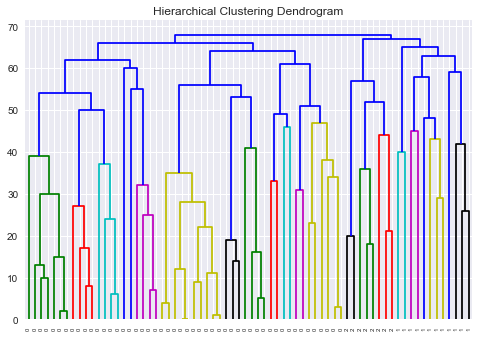

In [24]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()

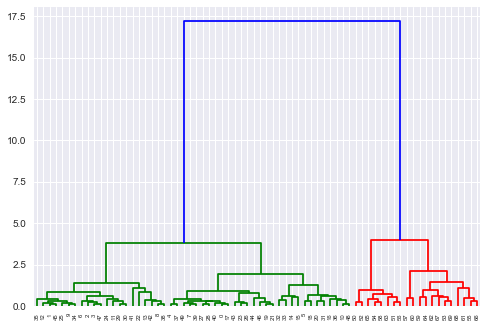

In [25]:
link_matrix = ward(X)
dendrogram(link_matrix)
plt.show()